In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

sc.set_figure_params(dpi=100, frameon=False, figsize=(5,5), facecolor='white')

In [3]:
# read in the original data
orig_data = pd.read_excel('../data/Supplementary Table 2.xlsx', index_col=0, sheet_name=0)
orig_data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
Sheet A. Table of TPMs for all non-mitochondrial coding genes,,,,,,,,,,,,,,,,,,,,,
-,-,-,-,-,sample #,1,2,3,4,5,...,61,62,63,64,65,66,67,68,69,70
gene_id,gene_symbol,chr,strand,start,end,21T3L,21T6L,22T10L,22T10R,23T2L,...,86T6R,86T7R,87T5L,88T10R,89T6L,89T6R,90T8R,91T4L,91T4R,91T5L
ENSG00000000003.14,TSPAN6,chrX,-,100627109,100639991,48.090108,26.886481,45.554793,25.934186,23.485341,...,28.538672,18.82616,14.752043,15.646768,11.206222,23.109901,14.063167,13.816744,20.270817,19.176593
ENSG00000000005.5,TNMD,chrX,+,100584802,100599885,0,0,3.889466,0.882501,0,...,0,0,0,0,0,0,0.36899,0,0,0
ENSG00000000419.12,DPM1,chr20,-,50934867,50958555,9.640547,55.626884,60.275889,51.86645,40.939527,...,20.134708,11.888621,10.429186,43.762997,9.029326,11.524989,11.994193,40.791259,28.054196,14.58365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000284725.1,AC093762.3,chr2,-,227724440,227724757,0,0,0,0,0.031729,...,0.145571,0.085548,0,0,0,0,0,0,0,0
ENSG00000284730.1,AC068987.5,chr12,-,51813940,51814926,4.860058,0.566331,0.414765,1.035164,1.281915,...,1.066392,2.650403,1.316428,0.373294,0.953769,0.345857,1.088997,0.402233,1.476647,1.634124
ENSG00000284732.1,AP002512.4,chr11,-,56459221,56473352,0,0.019616,0.028415,0.019132,0.022362,...,0.023779,0.08068,0.042211,0.020766,0.032021,0.041145,0.017628,0.014568,0.016934,0


In [4]:
# format the counts data
counts = orig_data.iloc[2:,5:].copy()
counts.columns = orig_data.iloc[1,5:].to_list()
counts.index = orig_data.iloc[2:,0].to_list()
# counts = (counts * 1e6).astype(int).copy() # reverse the TPM effect and round to the nearest integer

In [5]:
counts

,21T3L,21T6L,22T10L,22T10R,23T2L,23T2R,24T2R,25T12R,26T3R,26T4R,...,86T6R,86T7R,87T5L,88T10R,89T6L,89T6R,90T8R,91T4L,91T4R,91T5L
TSPAN6,48.090108,26.886481,45.554793,25.934186,23.485341,35.661667,26.631525,5.604373,9.171073,3.542553,...,28.538672,18.82616,14.752043,15.646768,11.206222,23.109901,14.063167,13.816744,20.270817,19.176593
TNMD,0,0,3.889466,0.882501,0,1.274361,0,0,1.073602,0,...,0,0,0,0,0,0,0.36899,0,0,0
DPM1,9.640547,55.626884,60.275889,51.86645,40.939527,66.097361,48.740733,0,31.043551,15.17759,...,20.134708,11.888621,10.429186,43.762997,9.029326,11.524989,11.994193,40.791259,28.054196,14.58365
SCYL3,9.361408,12.534168,17.196149,15.08531,12.799486,17.533816,12.530596,13.162664,17.080973,8.450182,...,8.14499,8.767862,13.130107,8.5611,11.320293,9.332285,9.045819,10.800517,11.091609,12.404088
C1orf112,0,7.903586,9.92105,7.07838,8.627662,12.477321,5.631222,0,2.844368,0.427731,...,8.224913,6.451447,4.909543,7.083004,2.815751,4.503534,5.574462,13.884223,9.794073,5.625154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC093762.3,0,0,0,0,0.031729,0.043821,0.099585,0,0,0,...,0.145571,0.085548,0,0,0,0,0,0,0,0
AC068987.5,4.860058,0.566331,0.414765,1.035164,1.281915,0.988304,0.898399,5.051823,0.786075,2.464757,...,1.066392,2.650403,1.316428,0.373294,0.953769,0.345857,1.088997,0.402233,1.476647,1.634124
AP002512.4,0,0.019616,0.028415,0.019132,0.022362,0.048717,0.045187,0.105034,0.033443,0.092983,...,0.023779,0.08068,0.042211,0.020766,0.032021,0.041145,0.017628,0.014568,0.016934,0
OR4F29,1.339164,0.272279,0.941436,0.843979,1.208254,1.166701,0.582177,1.83744,0.186894,0.091685,...,0.645767,0.680477,0.329588,1.056157,0.514159,0.514896,0.340697,0.412974,0.423572,0.39523


In [6]:
# format the var data
var_df = orig_data.iloc[2:,:5].copy()
var_df.columns = orig_data.iloc[1,:5]
var_df.index.name = None
var_df.columns.name = None
var_df = var_df.astype(str).copy()

In [7]:
var_df

,gene_symbol,chr,strand,start,end
ENSG00000000003.14,TSPAN6,chrX,-,100627109,100639991
ENSG00000000005.5,TNMD,chrX,+,100584802,100599885
ENSG00000000419.12,DPM1,chr20,-,50934867,50958555
ENSG00000000457.13,SCYL3,chr1,-,169849631,169894267
ENSG00000000460.16,C1orf112,chr1,+,169662007,169854080
...,...,...,...,...,...
ENSG00000284725.1,AC093762.3,chr2,-,227724440,227724757
ENSG00000284730.1,AC068987.5,chr12,-,51813940,51814926
ENSG00000284732.1,AP002512.4,chr11,-,56459221,56473352
ENSG00000284733.1,OR4F29,chr1,-,450703,451697


In [8]:
# read in the original metadata
orig_metadata = pd.read_excel('../data/Supplementary Table 2.xlsx', index_col=0, sheet_name=3)
orig_metadata

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
Sheet D. Sample TPMs with adequate neuronal mRNA,,,,,,,,,,,,,,,,,,,,,
pain state,-,-,-,-,-,P,N,P,P,P,...,P,P,P,P,N,N,N,N,P,P
age,-,-,-,-,-,59,61,61,57,60,...,39,39,40,40,55,63,63,59,77,77
sex,-,-,-,-,-,M,M,M,F,F,...,F,F,F,F,M,F,F,M,M,M
sample_id,-,-,-,-,-,21T6L,22T10L,22T10R,23T2L,24T2R,...,85T3R,85T5L,86T6R,86T7R,87T5L,89T6L,89T6R,90T8R,91T4R,91T5L
serial_no,-,-,-,-,-,1,2,3,4,5,...,42,43,44,45,46,47,48,49,50,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,# TPMs > 0.1,16812,17196,16952,16938,16245,...,16424,16208,16905,16915,16869,16632,16697,17000,17046,16874
NaN,NaN,NaN,NaN,NaN,# TPMs > 1.0,15024,15366,15158,15164,15004,...,15131,14853,15564,15592,15395,15053,15305,15576,15621,15504
NaN,NaN,NaN,NaN,NaN,# TPMs > 10.0,11478,11744,11629,11585,11353,...,10157,9683,11445,11126,10722,9943,10787,11173,11534,10974


In [9]:
metadata = orig_metadata.iloc[:5,5:].copy()
metadata.columns = metadata.loc['sample_id',:].to_list()
metadata.index.name = None
metadata = metadata.astype(str)

In [10]:
metadata

,21T6L,22T10L,22T10R,23T2L,24T2R,25T12R,26T3R,26T4R,29T8R,30T3R,...,85T3R,85T5L,86T6R,86T7R,87T5L,89T6L,89T6R,90T8R,91T4R,91T5L
pain state,P,N,P,P,P,N,P,P,N,P,...,P,P,P,P,N,N,N,N,P,P
age,59,61,61,57,60,60,55,55,79,70,...,39,39,40,40,55,63,63,59,77,77
sex,M,M,M,F,F,F,M,M,M,M,...,F,F,F,F,M,F,F,M,M,M
sample_id,21T6L,22T10L,22T10R,23T2L,24T2R,25T12R,26T3R,26T4R,29T8R,30T3R,...,85T3R,85T5L,86T6R,86T7R,87T5L,89T6L,89T6R,90T8R,91T4R,91T5L
serial_no,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51


In [11]:
# keep only the samples that are intersected between the counts and metadata
counts = counts[metadata.columns].copy()
counts

,21T6L,22T10L,22T10R,23T2L,24T2R,25T12R,26T3R,26T4R,29T8R,30T3R,...,85T3R,85T5L,86T6R,86T7R,87T5L,89T6L,89T6R,90T8R,91T4R,91T5L
TSPAN6,26.886481,45.554793,25.934186,23.485341,26.631525,5.604373,9.171073,3.542553,12.314733,8.611656,...,14.9546,11.229283,28.538672,18.82616,14.752043,11.206222,23.109901,14.063167,20.270817,19.176593
TNMD,0,3.889466,0.882501,0,0,0,1.073602,0,0,0,...,0,0,0,0,0,0,0,0.36899,0,0
DPM1,55.626884,60.275889,51.86645,40.939527,48.740733,0,31.043551,15.17759,30.45898,0,...,6.126711,0,20.134708,11.888621,10.429186,9.029326,11.524989,11.994193,28.054196,14.58365
SCYL3,12.534168,17.196149,15.08531,12.799486,12.530596,13.162664,17.080973,8.450182,12.007074,14.3822,...,3.586282,5.932536,8.14499,8.767862,13.130107,11.320293,9.332285,9.045819,11.091609,12.404088
C1orf112,7.903586,9.92105,7.07838,8.627662,5.631222,0,2.844368,0.427731,3.117834,0,...,1.810549,1.334961,8.224913,6.451447,4.909543,2.815751,4.503534,5.574462,9.794073,5.625154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC093762.3,0,0,0,0.031729,0.099585,0,0,0,0,0,...,0,0,0.145571,0.085548,0,0,0,0,0,0
AC068987.5,0.566331,0.414765,1.035164,1.281915,0.898399,5.051823,0.786075,2.464757,0.319113,1.043164,...,2.976725,4.510377,1.066392,2.650403,1.316428,0.953769,0.345857,1.088997,1.476647,1.634124
AP002512.4,0.019616,0.028415,0.019132,0.022362,0.045187,0.105034,0.033443,0.092983,0.029586,0.00787,...,0.022459,0,0.023779,0.08068,0.042211,0.032021,0.041145,0.017628,0.016934,0
OR4F29,0.272279,0.941436,0.843979,1.208254,0.582177,1.83744,0.186894,0.091685,0.144203,1.396948,...,0.608971,0.235532,0.645767,0.680477,0.329588,0.514159,0.514896,0.340697,0.423572,0.39523


In [12]:
from scipy.sparse import csr_matrix

adata = sc.AnnData(csr_matrix(counts.T.values.astype(np.float64)), var=var_df, obs=metadata.T)
adata.var['gene_id'] = adata.var.index.copy()
adata.layers['TPM'] = adata.X.copy()

In [13]:
adata.layers['counts'] = (adata.X * 1e6).astype(int).copy()
adata.X = adata.layers['counts'].copy()

In [14]:
adata.write('./Results_h5ad/01_bulk_hDRG.h5ad')

# SenMayo Analysis

In [3]:
adata = sc.read_h5ad('./Results_h5ad/01_bulk_hDRG.h5ad')

In [15]:
adata =  adata[adata.obs['pain state'] != 'Undetermined'].copy()

In [16]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers['log1p'] = adata.X.copy()
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')

In [17]:
senmayo = pd.read_excel('./SenMayo.xlsx', sheet_name=0)
senmayo

,Gene(human),Classification,State,Reference
0,ACVR1B,Transmembrane signal receptors,Transmembrane,26
1,ANG,Miscellaneous,Secreted,"81,88"
2,ANGPT1,Intercellular signal molecule,Secreted,57
3,ANGPTL4,Intercellular signal molecule,Secreted,"18,57"
4,AREG,Growth factor,Intracellular,"81,88,89"
...,...,...,...,...
120,VEGFA,Growth factor,Secreted,"26,42,83,89"
121,VEGFC,Growth factor,Secreted,89
122,VGF,Intercellular signal molecule,Secreted,56
123,WNT16,Intercellular signal molecule,Secreted,57


In [11]:
adata.var_names = adata.var['gene_symbol'].astype(str).copy()
adata.var_names_make_unique()

In [19]:
sc.tl.score_genes(adata, senmayo['Gene(human)'].to_list(), ctrl_size=len(senmayo['Gene(human)'].to_list()), score_name='SenMayo')

In [20]:
adata.obs['pain state'] = adata.obs['pain state'].astype('category').cat.reorder_categories(['N','P'])
idx_sort = adata.obs.sort_values(['pain state']).index
adata = adata[idx_sort,:].copy()

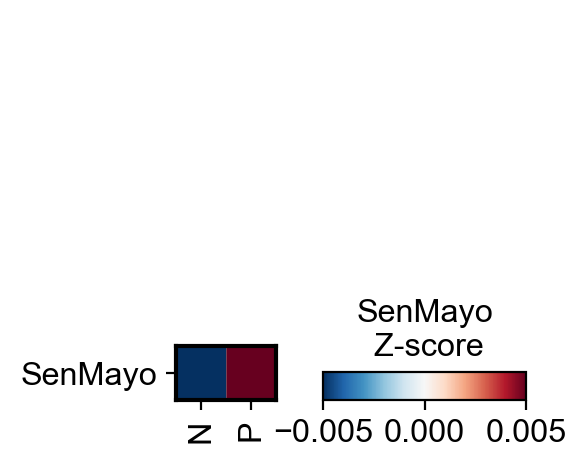

In [14]:
sc.pl.matrixplot(adata, 'SenMayo', groupby='pain state', cmap='RdBu_r',
                 dendrogram=False, swap_axes=True, vmin=-0.005, vmax=0.005,
                 colorbar_title='SenMayo\n Z-score', save='_SenMayo.pdf')

In [22]:
adata.write('./Results_h5ad/01_bulk_hDRG_ready.h5ad')

In [2]:
adata = sc.read('./Results_h5ad/01_bulk_hDRG_ready.h5ad')

/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [23]:
adata.obs['Patient_ID'] = adata.obs.sample_id.map(lambda x: x[:2])

In [24]:
df_ = pd.read_csv('../data/patients.csv', index_col=0)
df_['Patient_ID'] = df_.iloc[:,0].str.split(':').str[0]

In [25]:
caci_dict = df_.groupby('Patient_ID')['Primary tumour (prior chemotherapy/systemic treatments)'].first().to_dict()

In [26]:
adata.obs['Treatment'] = adata.obs['Patient_ID'].map(caci_dict).map(lambda x: 'N' if '(N)' in x else 'Y')

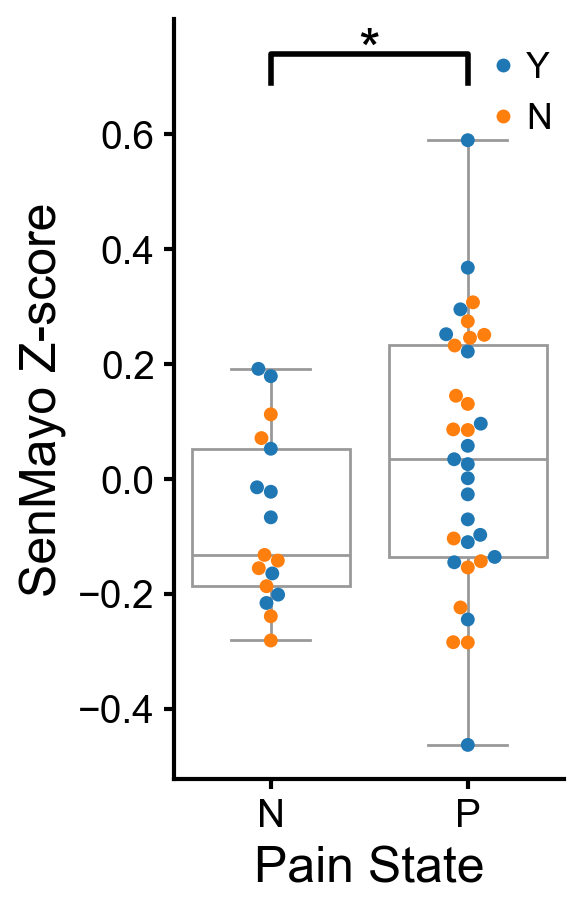

In [27]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5,5))
sns.boxplot(x='pain state', y='SenMayo', data=adata.obs, ax=ax, color='1')
sns.swarmplot(x='pain state', y='SenMayo', data=adata.obs, ax=ax, size=5, hue='Treatment')

max_val = max(adata.obs.SenMayo)
plt.plot([0,0,1,1], [max_val+0.1, max_val+0.15, max_val+0.15, max_val+0.1], lw=2, c='k')
plt.text(0.5, max_val+0.15, '*', ha='center', va='center', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

ax.tick_params(width=1.5)
ax.grid(False)
ax.set_xlabel('Pain State', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.set_ylabel('SenMayo Z-score', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.legend(loc='upper right', bbox_to_anchor=(1.05,1), frameon=False)


In [3]:
from scipy import stats

a = adata.obs.SenMayo[adata.obs['pain state'] == 'N']
b = adata.obs.SenMayo[adata.obs['pain state'] == 'P']
stats.ttest_ind(a, b, equal_var=True, alternative='less', random_state=42)

TtestResult(statistic=-1.7698819153425058, pvalue=0.04154928460835549, df=48.0)

In [4]:
stats.levene(a, b, center='median')

LeveneResult(statistic=2.968337018830637, pvalue=0.09134676335510403)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


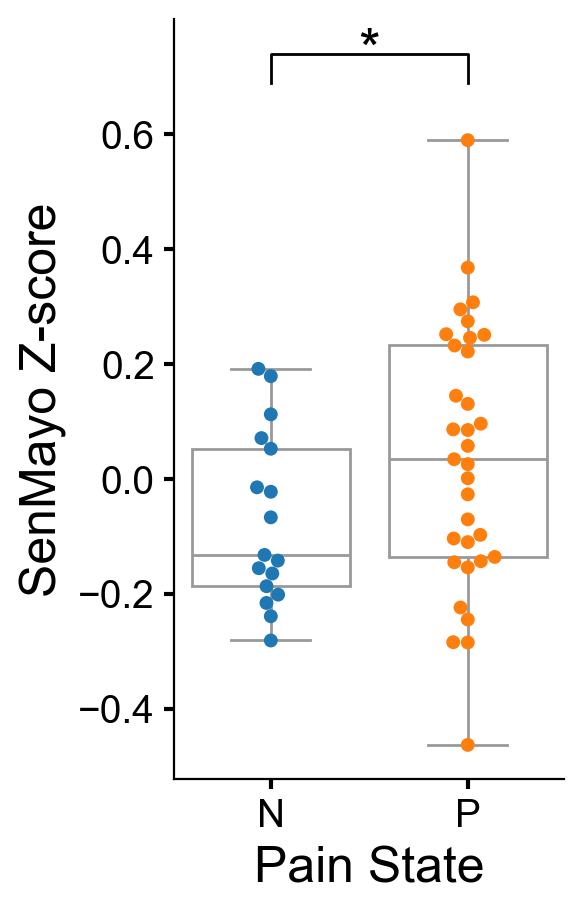

In [3]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5,5))
sns.boxplot(x='pain state', y='SenMayo', data=adata.obs, ax=ax, color='1')
sns.swarmplot(x='pain state', y='SenMayo', data=adata.obs, ax=ax, size=5, hue='pain state')

max_val = max(adata.obs.SenMayo)
plt.plot([0,0,1,1], [max_val+0.1, max_val+0.15, max_val+0.15, max_val+0.1], lw=1, c='k')
plt.text(0.5, max_val+0.15, '*', ha='center', va='center', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# for axis in ['bottom','left']:
#     ax.spines[axis].set_linewidth(1.5)

ax.tick_params(width=1.5)
ax.grid(False)
ax.set_xlabel('Pain State', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.set_ylabel('SenMayo Z-score', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.legend(loc='upper right', bbox_to_anchor=(1.05,1), frameon=False)

fig.savefig('/Users/pax/Manu_fig/eps/boxplot_hDRG_bulk_SenMayo.eps', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


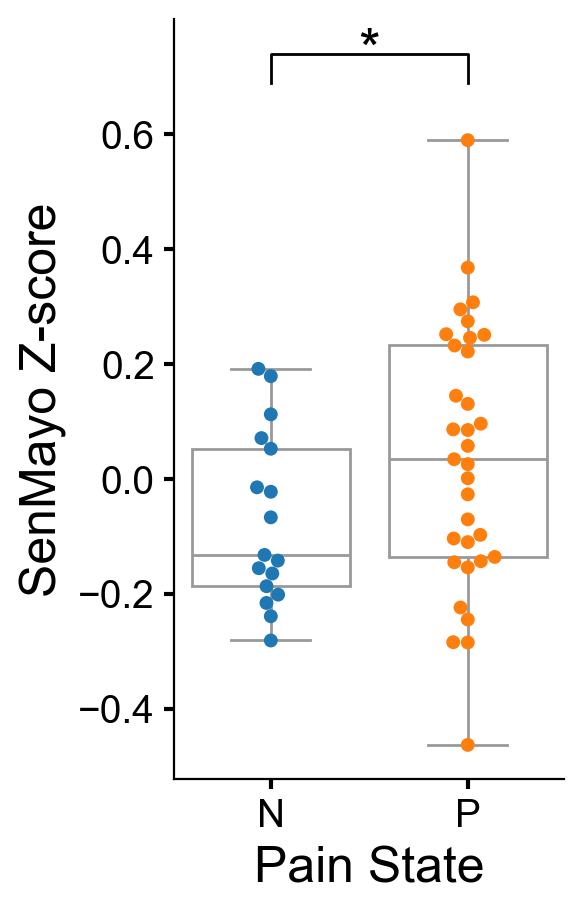

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5,5))
sns.boxplot(x='pain state', y='SenMayo', data=adata.obs, ax=ax, color='1')
sns.swarmplot(x='pain state', y='SenMayo', data=adata.obs, ax=ax, size=5, hue='pain state')

max_val = max(adata.obs.SenMayo)
plt.plot([0,0,1,1], [max_val+0.1, max_val+0.15, max_val+0.15, max_val+0.1], lw=1, c='k')
plt.text(0.5, max_val+0.15, '*', ha='center', va='center', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# for axis in ['bottom','left']:
#     ax.spines[axis].set_linewidth(1.5)

ax.tick_params(width=1.5)
ax.grid(False)
ax.set_xlabel('Pain State', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.set_ylabel('SenMayo Z-score', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.legend(loc='upper right', bbox_to_anchor=(1.05,1), frameon=False)

fig.savefig('/Users/pax/Manu_fig/boxplot_hDRG_bulk_SenMayo.pdf', bbox_inches='tight')

In [2]:
adata = sc.read_h5ad('./Results_h5ad/01_bulk_hDRG_ready.h5ad')

/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/pax/miniconda3/envs/hDRG/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
adata.obs.age = adata.obs.age.astype(int)

In [12]:
from scipy import stats

a = adata.obs.age[adata.obs['pain state'] == 'N']
b = adata.obs.age[adata.obs['pain state'] == 'P']
stats.ttest_ind(a, b, equal_var=True, alternative='two-sided', random_state=42)

TtestResult(statistic=0.6654439496571486, pvalue=0.5089517288355312, df=48.0)

In [13]:
stats.levene(a, b, center='median')

LeveneResult(statistic=0.3833814631819619, pvalue=0.5387269132391449)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


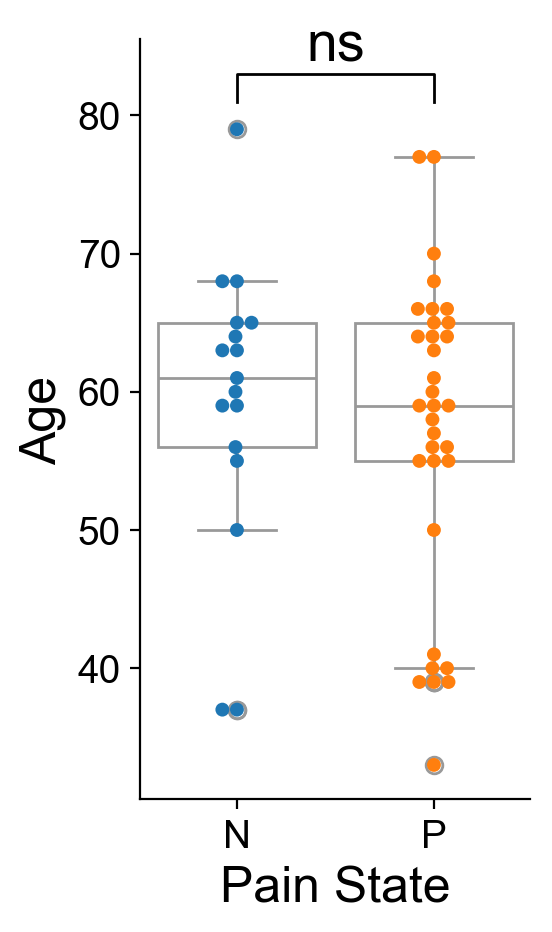

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5,5))
sns.boxplot(x='pain state', y='age', data=adata.obs, ax=ax, color='1')
sns.swarmplot(x='pain state', y='age', data=adata.obs, ax=ax, size=5, hue='pain state')

max_val = max(adata.obs.age)
plt.plot([0,0,1,1], [max_val+2, max_val+4, max_val+4, max_val+2], lw=1, c='k')
plt.text(0.5, max_val+6, 'ns', ha='center', va='center', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# for axis in ['bottom','left']:
#     ax.spines[axis].set_linewidth(1.5)

# ax.tick_params(width=1.5)
ax.grid(False)
ax.set_xlabel('Pain State', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.set_ylabel('Age', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.legend(loc='upper right', bbox_to_anchor=(1.05,1.05), frameon=False)
fig.savefig('/Users/pax/Manu_fig/eps/boxplot_hDRG_bulk_age.eps', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


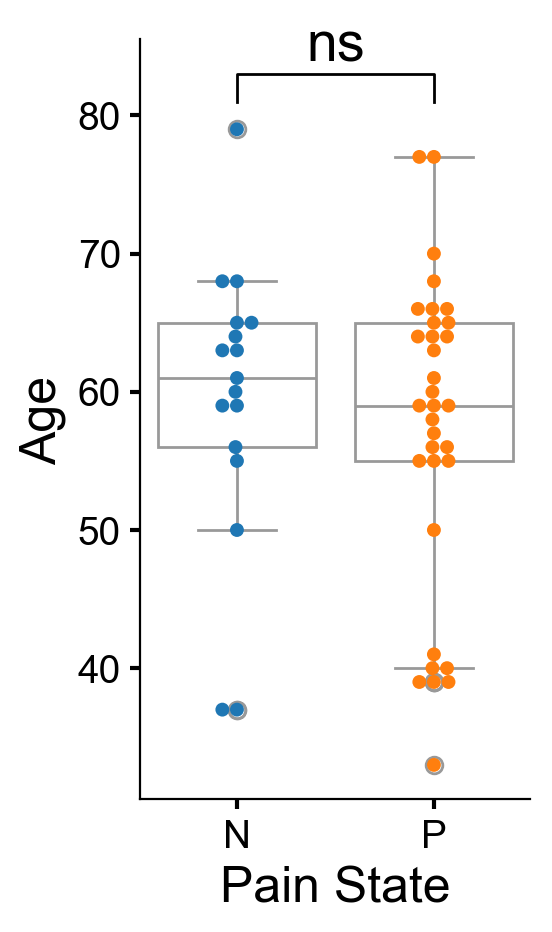

In [9]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5,5))
sns.boxplot(x='pain state', y='age', data=adata.obs, ax=ax, color='1')
sns.swarmplot(x='pain state', y='age', data=adata.obs, ax=ax, size=5, hue='pain state')

max_val = max(adata.obs.age)
plt.plot([0,0,1,1], [max_val+2, max_val+4, max_val+4, max_val+2], lw=1, c='k')
plt.text(0.5, max_val+6, 'ns', ha='center', va='center', fontsize=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# for axis in ['bottom','left']:
#     ax.spines[axis].set_linewidth(1.5)

# ax.tick_params(width=1.5)
ax.grid(False)
ax.set_xlabel('Pain State', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.set_ylabel('Age', fontdict={'fontsize': 18, 'fontweight': 'medium'})
ax.legend(loc='upper right', bbox_to_anchor=(1.05,1.05), frameon=False)
fig.savefig('/Users/pax/Manu_fig/boxplot_hDRG_bulk_age.pdf', bbox_inches='tight')